# Assignment 1: Simple Linear Regression

1. Read in the "Computers.csv" file & perform any desired EDA.
2. Fit a regression model with target = "price".  Fit your model on the feature with the strongest correlation to price
3. Interpret the model equation
4. Visualize the residuals of your model
5. Make predictions for common values of your feature

In [1]:
import pandas as pd

computers = pd.read_csv("../Data/Computers.csv")
computers.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1


### EDA

In [2]:
computers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   price    6259 non-null   int64 
 1   speed    6259 non-null   int64 
 2   hd       6259 non-null   int64 
 3   ram      6259 non-null   int64 
 4   screen   6259 non-null   int64 
 5   cd       6259 non-null   object
 6   multi    6259 non-null   object
 7   premium  6259 non-null   object
 8   ads      6259 non-null   int64 
 9   trend    6259 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 489.1+ KB


In [3]:
computers.describe()

,price,speed,hd,ram,screen,ads,trend
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000
mean,2219.576610,52.011024,416.601694,8.286947,14.608723,221.301007,15.926985
std,580.803956,21.157735,258.548445,5.631099,0.905115,74.835284,7.873984
min,949.000000,25.000000,80.000000,2.000000,14.000000,39.000000,1.000000
25%,1794.000000,33.000000,214.000000,4.000000,14.000000,162.500000,10.000000
50%,2144.000000,50.000000,340.000000,8.000000,14.000000,246.000000,16.000000
75%,2595.000000,66.000000,528.000000,8.000000,15.000000,275.000000,21.500000
max,5399.000000,100.000000,2100.000000,32.000000,17.000000,339.000000,35.000000


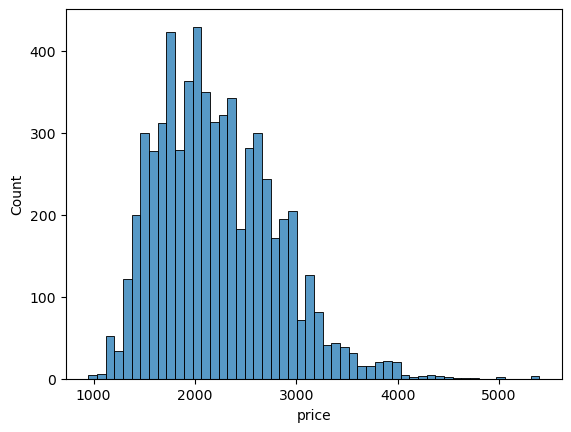

In [4]:
import seaborn as sns

sns.histplot(computers['price']);

In [5]:
computers.corr(numeric_only=True)

,price,speed,hd,ram,screen,ads,trend
price,1.000000,0.300976,0.430258,0.622748,0.296041,0.054540,-0.199987
speed,0.300976,1.000000,0.372304,0.234760,0.189074,-0.215232,0.405438
hd,0.430258,0.372304,1.000000,0.777726,0.232802,-0.323222,0.577790
ram,0.622748,0.234760,0.777726,1.000000,0.208954,-0.181670,0.276844
screen,0.296041,0.189074,0.232802,0.208954,1.000000,-0.093919,0.188614
ads,0.054540,-0.215232,-0.323222,-0.181670,-0.093919,1.000000,-0.318553
trend,-0.199987,0.405438,0.577790,0.276844,0.188614,-0.318553,1.000000


Best correlations to price from best to worst:  
1) ram
2) hd
3) speed
4) screen 
5) ads
6) trend

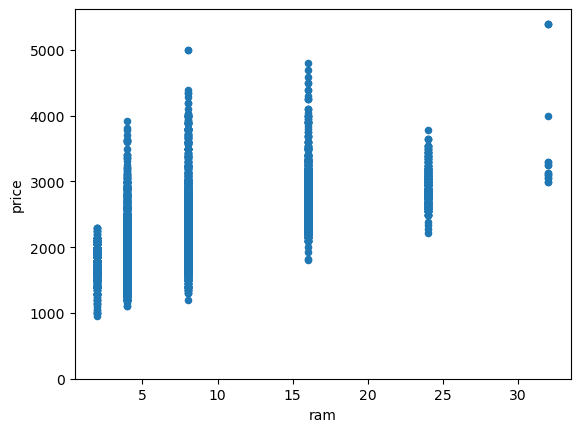

In [6]:
computers.plot.scatter(x='ram', y='price').set_ylim(0);

### Model Fitting

In [7]:
import statsmodels.api as sm

X = sm.add_constant(computers['ram'])
y = computers['price']

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     3964.
Date:                Mon, 06 Oct 2025   Prob (F-statistic):               0.00
Time:                        22:00:57   Log-Likelihood:                -47180.
No. Observations:                6259   AIC:                         9.436e+04
Df Residuals:                    6257   BIC:                         9.438e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1687.2925     10.221    165.073      0.000    1667.255    1707.330
ram           64.2316      1.020     62.959      0.000      62.232      66.232
==============================================================================
Omnibus:                     1327.783   Durbin-Watson:                   1.533
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3113.140
Skew:                           1.188   Prob(JB):                         0.00
Kurtosis:                       5.508   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Intepretation:


If computer did not have any ram, then the price would be **1687.2925**.  
For each MG increase in ram, we can expect to see a **64.2316** dollar increase in the price of a computer.

### Plot Residuals

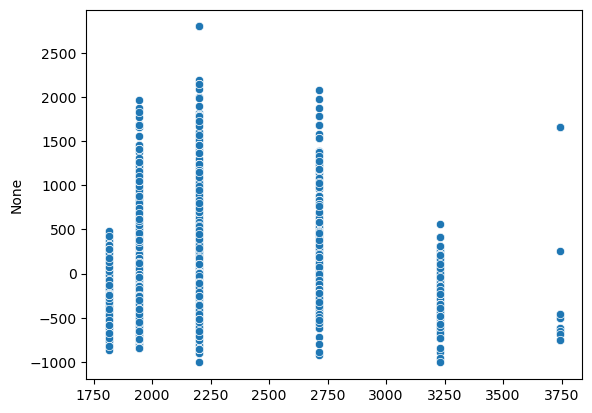

In [10]:
sns.scatterplot(x=model.predict(), y=model.resid);

### Make Predictions with the values below

In [11]:
feature_values = [0, 2, 4, 8, 16, 32, 64] # represent various values a ram could be.

In [12]:
predict_df = sm.add_constant(pd.DataFrame({'ram': feature_values}))
predict_df

,const,ram
0,1.0,0
1,1.0,2
2,1.0,4
3,1.0,8
4,1.0,16
5,1.0,32
6,1.0,64


In [13]:
model.predict(predict_df)

0    1687.292537
1    1815.755790
2    1944.219043
3    2201.145550
4    2714.998564
5    3742.704591
6    5798.116644
dtype: float64

ram of 0 - 1687.292537  
ram of 2 - 1815.755790  
ram of 4 - 1944.219043  
ram of 8 - 2201.145550  
ram of 16 - 2714.998564  
ram of 32 - 3742.704591  
ram of 64 - 5798.116644  

In [14]:
predictions = model.predict(predict_df)
predictions.index = feature_values
predictions

0     1687.292537
2     1815.755790
4     1944.219043
8     2201.145550
16    2714.998564
32    3742.704591
64    5798.116644
dtype: float64